In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import palettable.colorbrewer.sequential

Notebook for scratch work:
1. Deciding what to put in the package  
2. Figuring out how to do it

In [3]:
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)

In [4]:
blues = palettable.colorbrewer.sequential.Blues_9.mpl_colors
blues

[(0.9686274509803922, 0.984313725490196, 1.0),
 (0.8705882352941177, 0.9215686274509803, 0.9686274509803922),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.25882352941176473, 0.5725490196078431, 0.7764705882352941),
 (0.12941176470588237, 0.44313725490196076, 0.7098039215686275),
 (0.03137254901960784, 0.3176470588235294, 0.611764705882353),
 (0.03137254901960784, 0.18823529411764706, 0.4196078431372549)]

[]

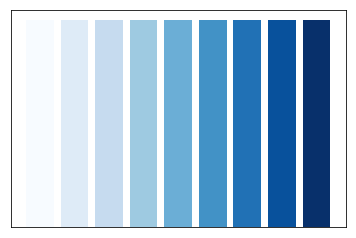

In [5]:
fig = plt.figure()
axs = fig.add_subplot(1, 1, 1)
axs.bar(range(1, 10), [1], color=blues)
axs.axes.get_xaxis().set_ticks([])
axs.axes.get_yaxis().set_ticks([])

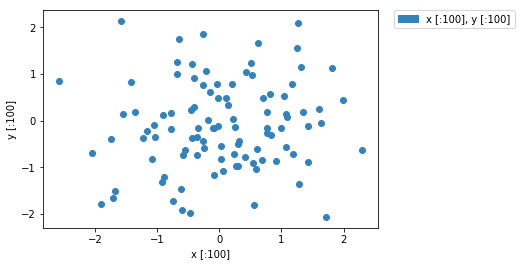

In [6]:
fig, axs = plt.subplots()
axs.scatter(x[:100], y[:100], color='#3182bd')
axs.set_xlabel('x [:100]')
axs.set_ylabel('y [:100]')

patch = mpatches.Patch(color='#3182bd', label='x [:100], y [:100]')
plt.legend(handles=[patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [7]:
def plot(x, y, n):
    """Scatter plot of first n elements of x, y"""
    fig, axs = plt.subplots()
    data_x = x[:n]
    data_y = y[:n]
    axs.scatter(data_x, data_y, color=blues[-1])
    axs.set_xlabel('{} [:{}]'.format('x', n))
    axs.set_ylabel('{} [:{}]'.format('y', n))
    
    patch = mpatches.Patch(color=blues[-1], label='{0} [:{1}], {2} [:{1}]'.format('x', n, 'y'))
    plt.legend(handles=[patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

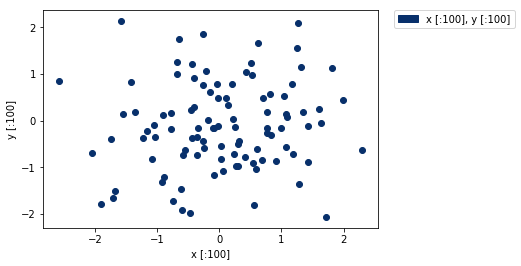

In [8]:
plot(x, y, 100)

In [9]:
def plot_p(x, y, n, iterations):
    """Scatter plot of first n elements of x, y iterations times"""
    fig = plt.figure(figsize=(iterations * 5, 5))
    for i in range(iterations): # Plot all iterations
        p = i * n # Start indice
        q = (i + 1) * n # Stop indice
        axs = fig.add_subplot(1, iterations, i + 1)
        axs.scatter(x[p:q], y[p:q], color = blues[-1])
        axs.set_xlabel('{} [{}:{}]'.format('x', p, q))
        axs.set_ylabel('{} [{}:{}]'.format('y', p, q))

        patch = mpatches.Patch(color=blues[-1], label='{0} [{1}:{2}], {3} [{1}:{2}]'.format('x', p, q, 'y'))
        plt.legend(handles=[patch], loc=1, borderaxespad=.25)

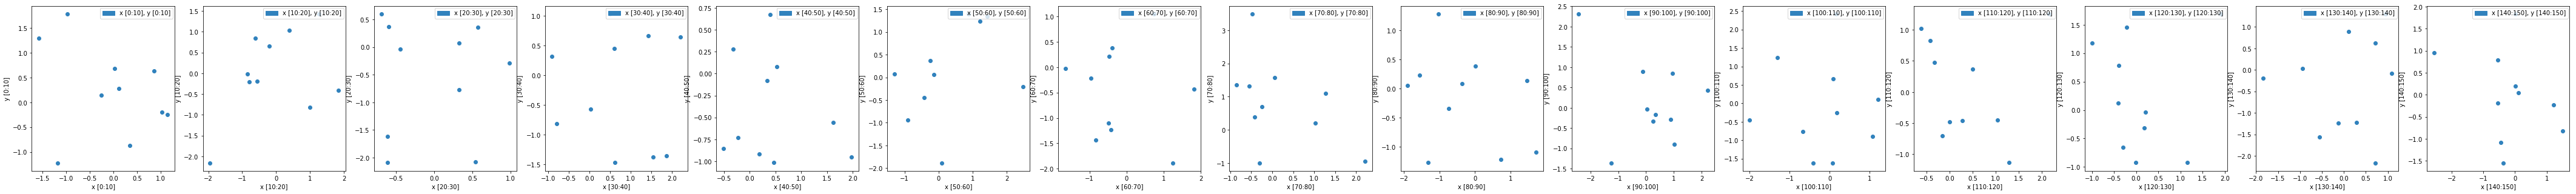

In [11]:
plot_p(x, y, 10, 15)

Takes too long for large iterations, ie ~100

Give up on loop, move on to generator for plotting

In [12]:
def plot_lag_exp(x, y, n, iterations, lag = 0):
    """Scatter plot of first n elements of x, y iterations times"""
    fig = plt.figure(1, figsize=(iterations * 5, 5))
    for i in range(iterations): # Plot all iterations
        p = i * n # Start indice
        q = (i + 1) * n # Stop indice
        axs = fig.add_subplot(1, iterations, i + 1)
        axs.scatter(x[p:q], y[p:q], color = blues[-1])
        axs.set_xlabel('{} [{}:{}]'.format('x', p, q))
        axs.set_ylabel('{} [{}:{}]'.format('y', p, q))

        patch = mpatches.Patch(color=blues[-1], label='{0} [{1}:{2}], {3} [{1}:{2}]'.format('x', p, q, 'y'))
        plt.legend(handles=[patch], loc=1, borderaxespad=.25)
        j = i
        while lag > i - j:
            p = (j - 1) * n # Start indice for lag
            q = j * n # Stop indice for lag
            #axs = fig.add_subplot(1, iterations, i + 1)
            axs.scatter(x[p:q], y[p:q], color = blues[-2 - i + j])
            axs.set_xlabel('{} [{}:{}]'.format('x', p, q))
            axs.set_ylabel('{} [{}:{}]'.format('y', p, q))

            patch = mpatches.Patch(color=blues[-2 - i + j], label='{0} [{1}:{2}], {3} [{1}:{2}]'.format('x', p, q, 'y'))
            plt.legend(handles=[patch], loc=1, borderaxespad=.25)
            j -= 1

In [13]:
#plot_lag_exp(x, y, 10, 5, 1)

In [65]:
def plot_lag(x, y, n, group = 0, lag = 0):
    """Scatter plot of group-th n elements of data and lag * n elements previous"""
    l = lag
    if l < 0:
        print('lag **kwarg should be an int between 0 and 8')
        raise
    if l > 8:
        print('max recommended lag **kwarg is 8')
        l = 8
    fig, axs = plt.subplots()
    data_x = x[group * n:(group+1) * n]
    data_y = y[group * n:(group+1) * n]
    axs.scatter(data_x, data_y, color=blues[-1])
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    for i in range(l): #Plot lagged groups in lighter color
        data_x = x[(group - i - 1) * n:(group - i) * n]
        data_y = y[(group - i - 1) * n:(group - i) * n]
        axs.scatter(data_x, data_y, color=blues[-1-i])
        
    patches = []
    for i in range(l + 1): #Create legend patches
        patches.append(mpatches.Patch(color=blues[-1-i], label='{0} [{1}:{2}], {3} [{1}:{2}]'.format('x', (group - i) * n, (group - i + 1) * n, 'y')))
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

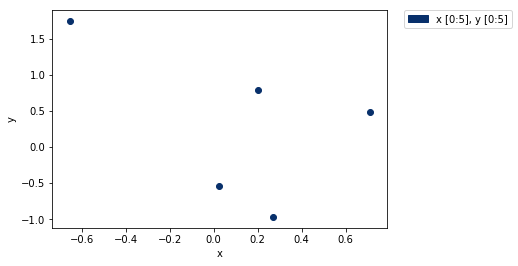

In [67]:
plot_lag(x, y, 5, 0)

In [ ]:
def plot_gen(x, y, n, iterations, lag = 0):
    """Scatter plot generator of x, y iterations times with last n points as lag"""
    

Maybe try in plotly  
Neat but I'll try to make something easier :)

In [97]:
import plotly
plotly.tools.set_credentials_file(username='ecboxer', api_key='PQst2b26g8S2N2mVl6wQ')

In [94]:
import plotly.plotly as py
import plotly.graph_objs as go

In [98]:
trace = go.Scatter(x = x, y = y, mode='markers')
data = [trace]
py.iplot(data, filename='basicScatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ecboxer/0 or inside your plot.ly account where it is named 'basicScatter'
